In [1]:
import numpy as np

from Methods_fixed_window_size import *
from Methods_fixed_window_size import Windowing as FixedWindowing
from Methods_windowing import Windowing as Windowing
from Methods_windowing_fix import Windowing as WindowingFix
from Plotting import Boxplots

# 0. Introduction
In this notebook we are going to check the difference between using the fixed windows size of 5 and using the entire window.

We will do this by comparing the errors it gets at one target point, specifically 2896 in this case.

We also take this opportunity to fix the original method of using hte entire window, which was not working properly when we wanted target points inside certain windows. We compare the fix to the original method and see that the fix works but due to some randomness in MMF doesn't produce the exact same results.

# 1. Load data

In [2]:
winFixedWindow = FixedWindowing(aggCurves)
winFixedWindow.set_points([16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512,
                           724, 1024, 1448, 2048, 2896], 5)

# This version of using hte entire window doesn't work properly when targets are in the windows
# Thus we only do this for one target
winAll = Windowing(aggCurves)
winAll.set_points([16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512,
                   724, 1024, 1448, 2048], [2896])

# This version fixes this problem
winAllFix = WindowingFix(aggCurves)
winAllFix.set_points([16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512,
                   724, 1024, 1448, 2048, 2896])

,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


,Count
size_train,
16,245
23,246
32,246
40,1
45,244
...,...
1048576,2
1482910,1
1486391,1


In [3]:
winFixedWindow.MMF()
winFixedWindow.MDS()
winAll.MMF()
winAll.MDS()
winAllFix.MMF()
winAllFix.MDS()

# Last method
winFixedWindow.Last()
winAll.Last()
winAllFix.Last()

# 2. Plot

In [4]:
errorMMFFixed = winFixedWindow.results['MMF']['test error']
errorMDSFixed = winFixedWindow.results['MDS']['test error']
errorMMFAll = winAll.results['MMF']['test error'][:, :, 4:]
errorMDSAll = winAll.results['MDS']['test error'][:, :, 4:]
errorMMFAllFix = winAllFix.results['MMF']['test error'][:, :, 4:, 4:]
errorMDSAllFix = winAllFix.results['MDS']['test error'][:, :, 4:, 4:]

# Last method
errorLastFixed = winFixedWindow.results['Last']['test error']
errorLastAll = winAll.results['Last']['test error'][:, :, 4:]
errorLastAllFix = winAllFix.results['Last']['test error'][:, :, 4:, 4:]

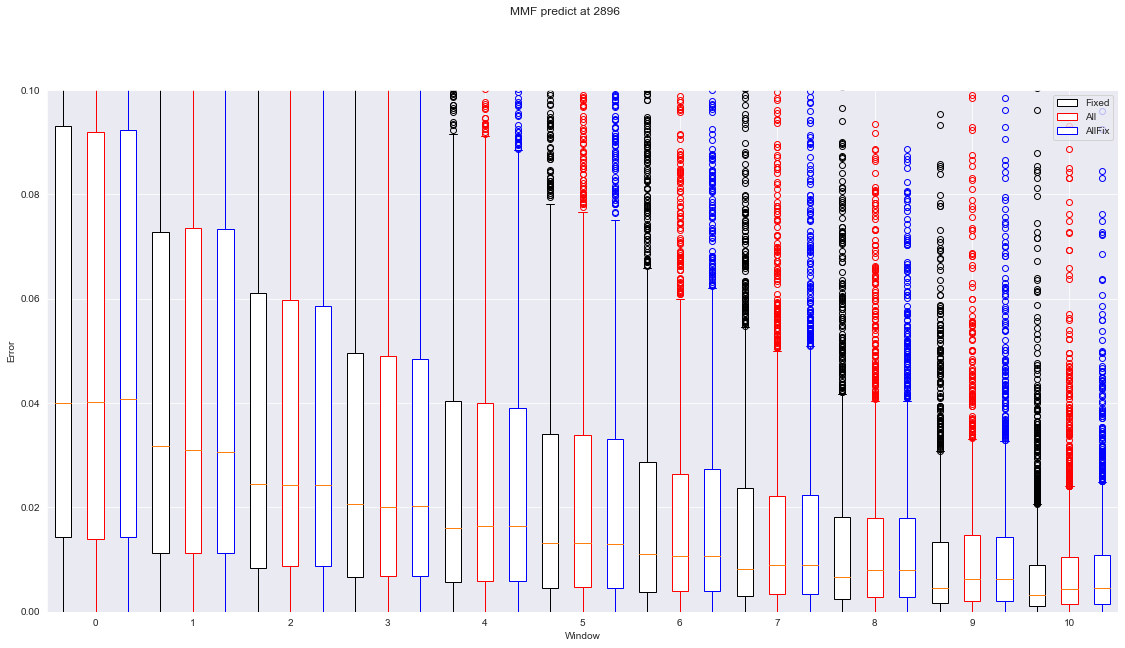

In [5]:
plots = {}
plots['Fixed'] = {str(i): errorMMFFixed[:,:,i,-1] for i in range(errorMMFFixed.shape[-1])}
plots['All'] = {str(i): errorMMFAll[:,:,i,-1] for i in range(errorMMFAll.shape[-2])}
plots['AllFix'] = {str(i): errorMMFAllFix[:,:,i,-1] for i in range(errorMMFAllFix.shape[-1])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='MMF predict at 2896', ylabel='Error', xlabel='Window')

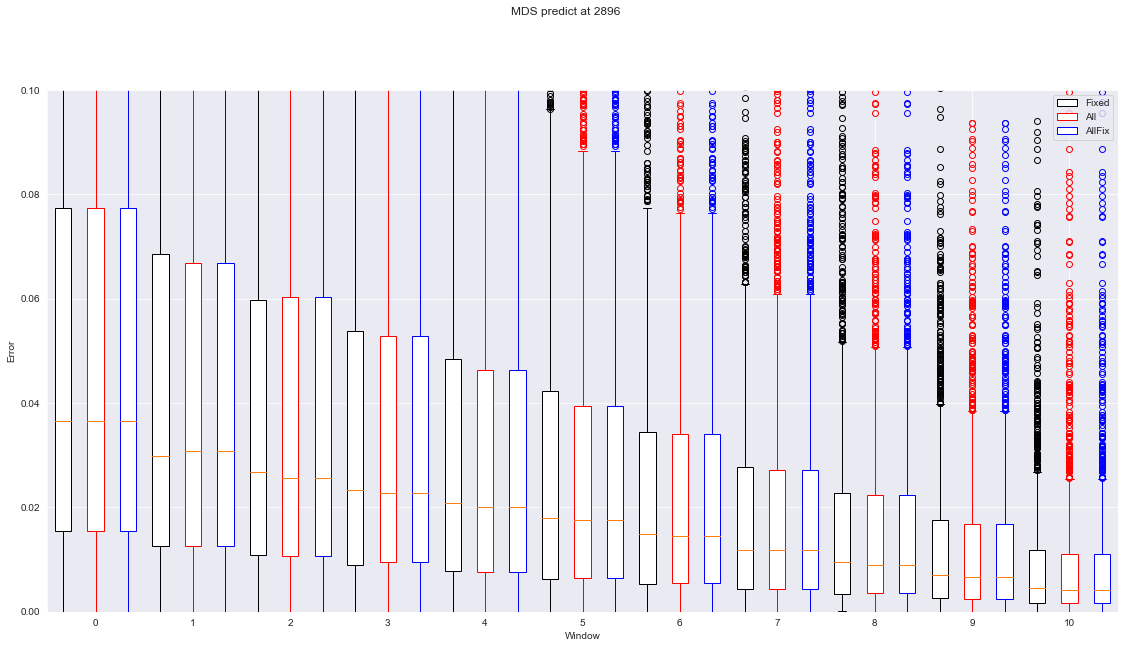

In [6]:
plots = {}
plots['Fixed'] = {str(i): errorMDSFixed[:,:,i,-1] for i in range(errorMDSFixed.shape[-1])}
plots['All'] = {str(i): errorMDSAll[:,:,i,-1] for i in range(errorMDSAll.shape[-2])}
plots['AllFix'] = {str(i): errorMDSAllFix[:,:,i,-1] for i in range(errorMDSAllFix.shape[-1])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='MDS predict at 2896', ylabel='Error', xlabel='Window')

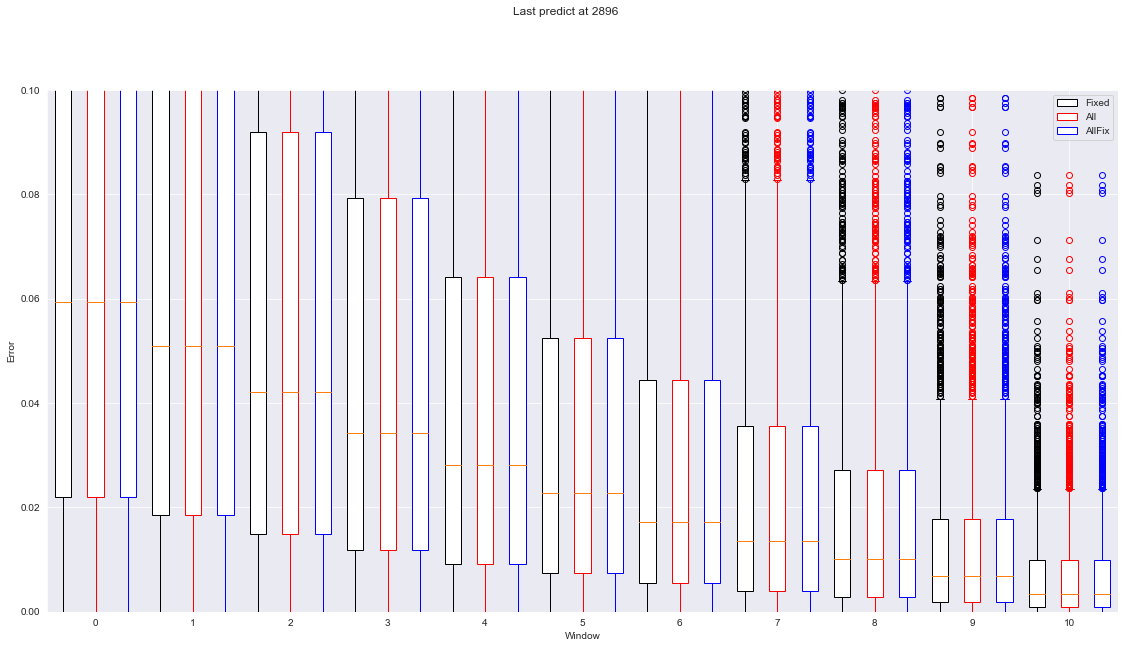

In [7]:
plots = {}
plots['Fixed'] = {str(i): errorLastFixed[:,:,i,-1] for i in range(errorLastFixed.shape[-1])}
plots['All'] = {str(i): errorLastAll[:,:,i,-1] for i in range(errorLastAll.shape[-2])}
plots['AllFix'] = {str(i): errorLastAllFix[:,:,i,-1] for i in range(errorLastAllFix.shape[-1])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='Last predict at 2896', ylabel='Error', xlabel='Window')

# 3. Conclusion
Looks like fixing the window size to 5 makes a negligible difference, it even makes the error better for MMF for the last coupe of windows.

In [8]:
# Due to randomness MMF won't predict the exact same thing
np.allclose(errorMMFAll[...,-1], errorMMFAllFix[...,-1], equal_nan=True)

False

In [10]:
# check last method, they should all be the same
print(np.allclose(errorLastAll[...,-1], errorLastAllFix[...,-1], equal_nan=True))
print(np.allclose(errorLastAll[...,-1], errorLastFixed[...,-1], equal_nan=True))

True
True


# 4. Quick side by side check of the methods

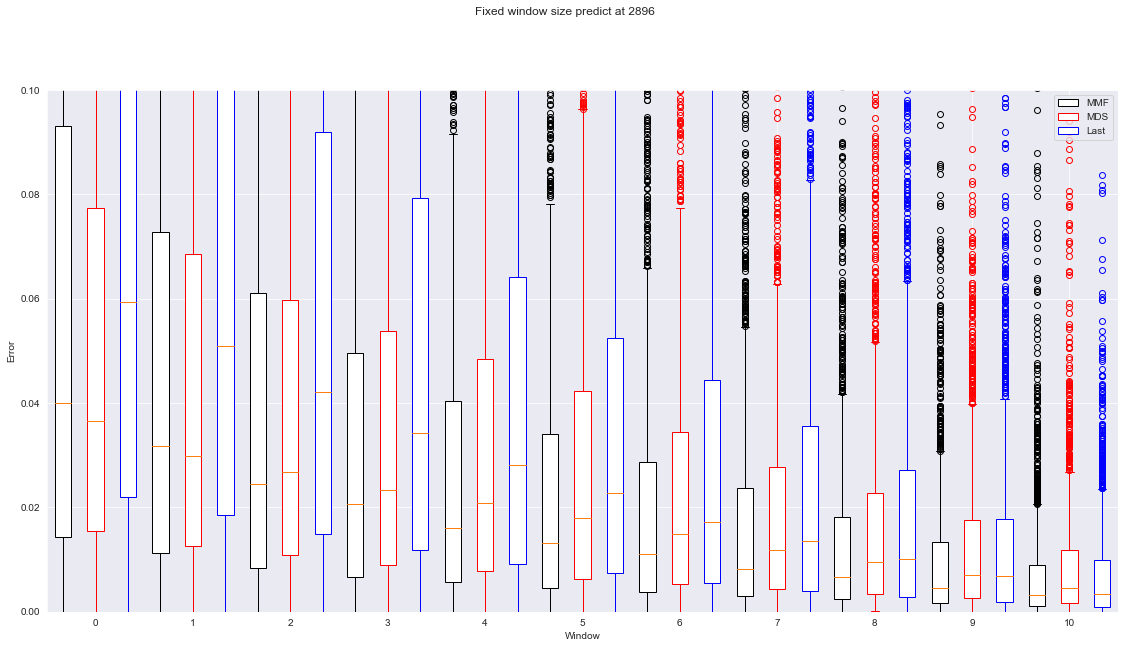

In [11]:
# Quick side by side for fixed window size of all the methods
plots = {}
plots['MMF'] = {str(i): errorMMFFixed[:,:,i,-1] for i in range(errorMMFFixed.shape[-1])}
plots['MDS'] = {str(i): errorMDSFixed[:,:,i,-1] for i in range(errorMDSFixed.shape[-1])}
plots['Last'] = {str(i): errorLastFixed[:,:,i,-1] for i in range(errorLastFixed.shape[-1])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='Fixed window size predict at 2896', ylabel='Error', xlabel='Window')

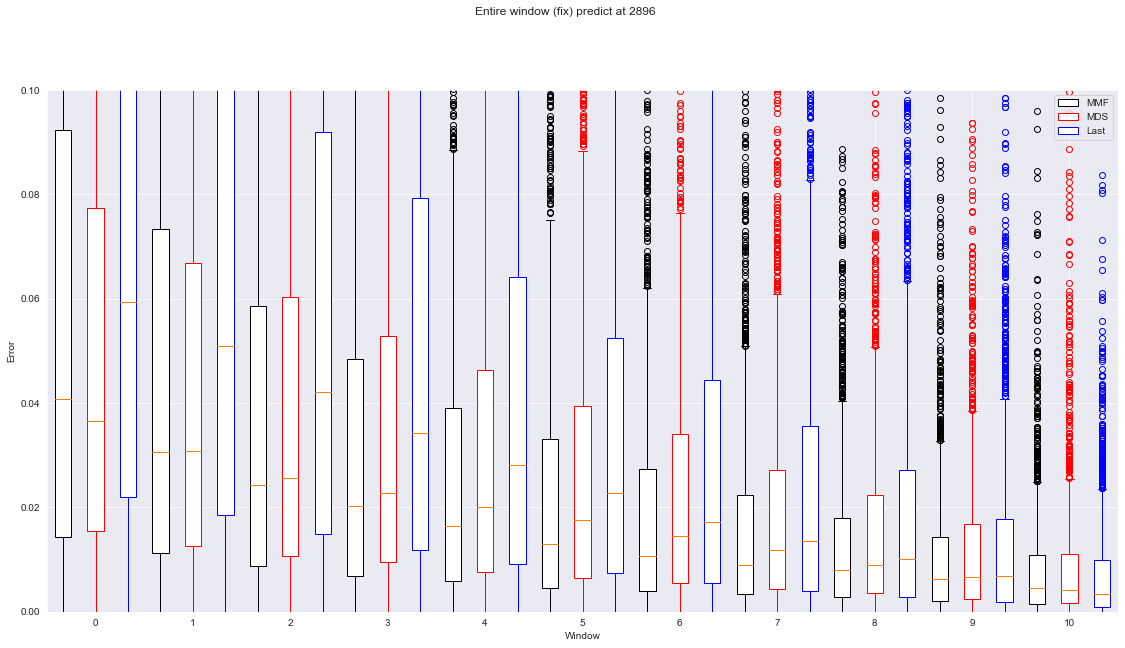

In [12]:
# Now for the entire window with the fix
plots = {}

plots['MMF'] = {str(i): errorMMFAllFix[:,:,i,-1] for i in range(errorMMFAllFix.shape[-1])}
plots['MDS'] = {str(i): errorMDSAllFix[:,:,i,-1] for i in range(errorMDSAllFix.shape[-1])}
plots['Last'] = {str(i): errorLastAllFix[:,:,i,-1] for i in range(errorLastAllFix.shape[-1])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='Entire window (fix) predict at 2896', ylabel='Error', xlabel='Window')

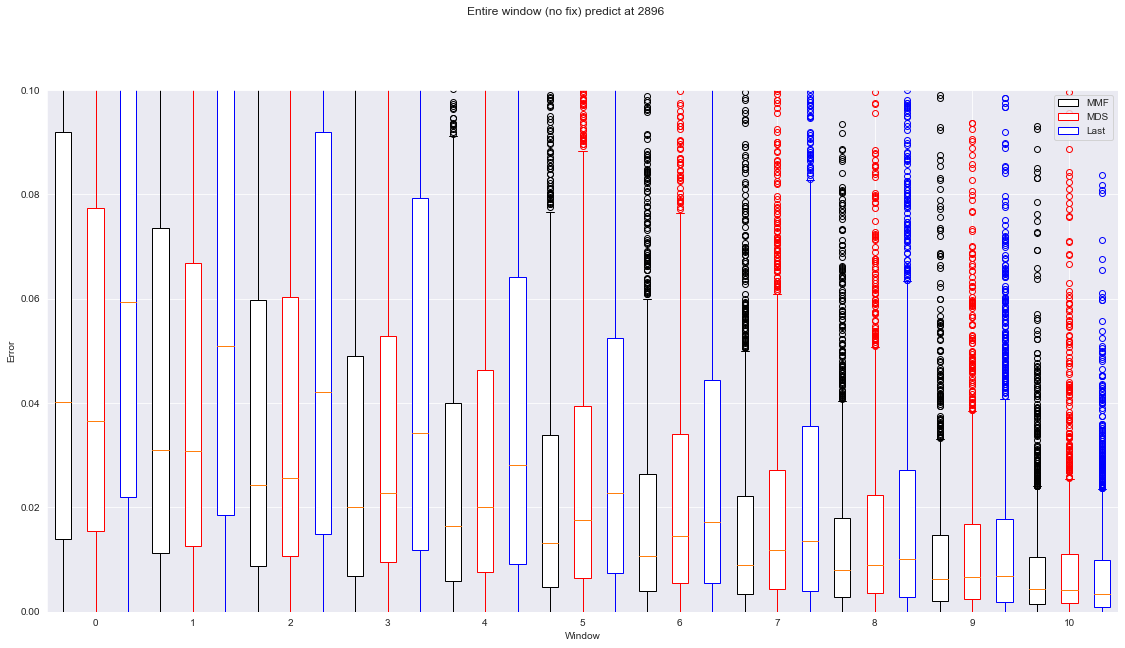

In [13]:
# Now for the entire window without the fix
plots = {}

plots['MMF'] = {str(i): errorMMFAll[:,:,i,-1] for i in range(errorMMFAll.shape[-2])}
plots['MDS'] = {str(i): errorMDSAll[:,:,i,-1] for i in range(errorMDSAll.shape[-2])}
plots['Last'] = {str(i): errorLastAll[:,:,i,-1] for i in range(errorLastAll.shape[-2])}

Boxplots(plots, ylim=[0,0.1], figsize=(3,2), title='Entire window (no fix) predict at 2896', ylabel='Error', xlabel='Window')